In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines_path = "../input/flight-delays/airlines.csv"
airport_path = "../input/flight-delays/airports.csv"
flights_path = "../input/flight-delays/flights.csv"

airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
flights_data["DEPARTURE_DELAY"].mean()

9.370158275198389

In [4]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_data.shape

(5819079, 31)

In [6]:
flights_seg = flights_data[0:150000]
flights_seg

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2015,1,10,6,EV,4607,N15572,XNA,IAH,1504,...,1735.0,46.0,0,0,NaN,0.0,0.0,0.0,46.0,0.0
149996,2015,1,10,6,WN,4388,N7723E,ATL,DAL,1505,...,1623.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149997,2015,1,10,6,WN,2903,N218WN,ATL,DCA,1505,...,1634.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149998,2015,1,10,6,WN,4519,N436WN,ATL,MCO,1505,...,1627.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TIME     

In [10]:
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flights_seg['delay'] = delay

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
flights_seg.value_counts("delay")

delay
0    104480
1     15460
3     15397
2     14663
dtype: int64

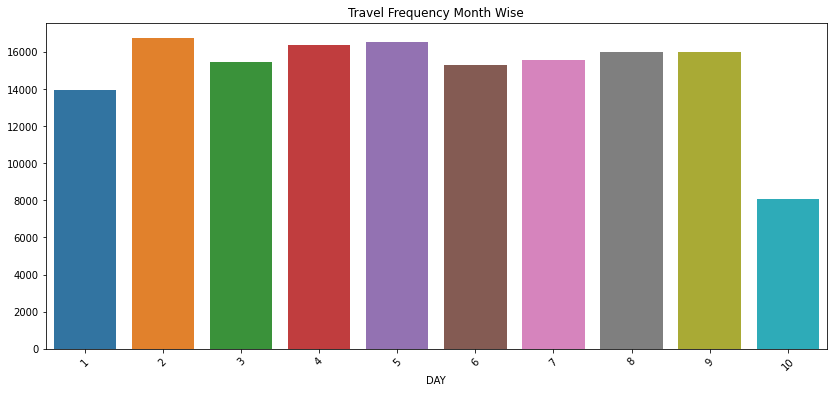

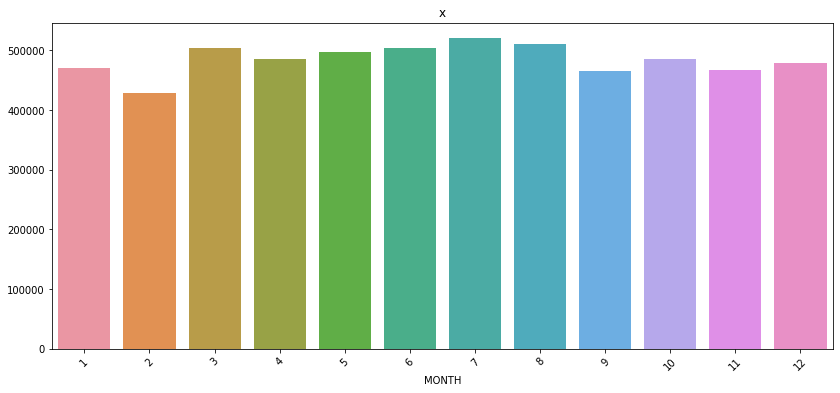

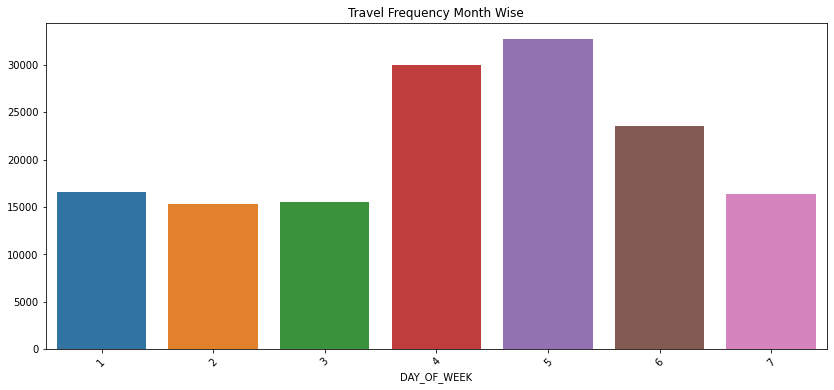

In [12]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(flights_seg.value_counts('DAY'), 'Travel Frequency Month Wise')
plot_bar(flights_data.value_counts('MONTH'), 'x')
plot_bar(flights_seg.value_counts('DAY_OF_WEEK'), 'Travel Frequency Month Wise')

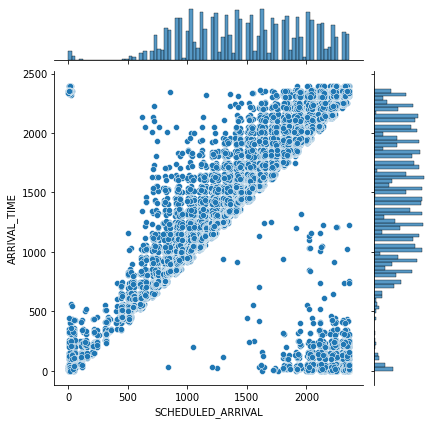

In [13]:
sns.jointplot(data=flights_seg, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

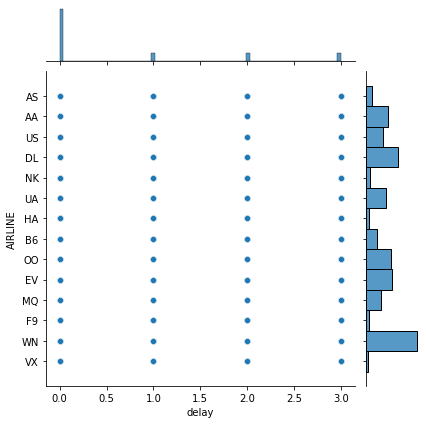

In [14]:
sns.jointplot(data=flights_seg, y="AIRLINE", x="delay")

<AxesSubplot:>

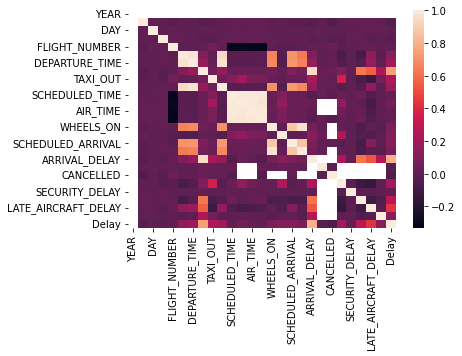

In [15]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)  
flights_data['Delay'] = Flight_data_delay
sns.heatmap(flights_data.corr())

In [16]:
flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                                             axis=1)
flights_data.describe()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,1.329602e+03,9.370158e+00,1.493808e+03,2.609863e-03,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00,3.394501e-01
std,3.405137e+00,8.783425e+00,4.837518e+02,3.708094e+01,5.071647e+02,5.102012e-02,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01,8.130325e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,9.170000e+02,-5.000000e+00,1.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.325000e+03,-2.000000e+00,1.520000e+03,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,1.730000e+03,7.000000e+00,1.918000e+03,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,2.359000e+03,1.988000e+03,2.400000e+03,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,3.000000e+00


<AxesSubplot:>

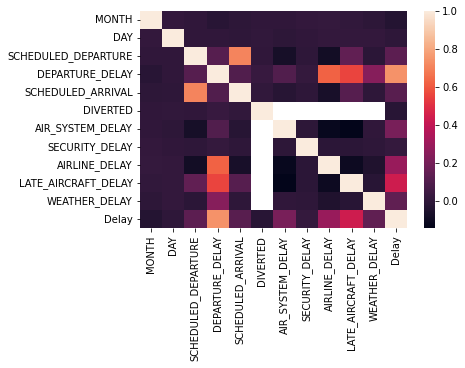

In [20]:
sns.heatmap(flights_data.corr())